In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")


In [2]:
# Load the dataset
df = pd.read_excel('profiles.xlsx')

# Display the first few rows to understand the structure
df.head()


,eid,parentEid,role,city,state,County
0,u-132-3366,NaN,campaignDirector,LOUISVILLE,KY,Jefferson
1,u-132-3395,NaN,organizer,CHESAPEAKE,KY,NaN
2,SrUstdhnK67K8T,u-132-3395,contact,LOUISVILLE,KY,Jefferson
3,0YiLde4r9Z6fEh,u-132-3395,contact,MADISONVILLE,KY,Hopkins
4,2lHrmFrMI6tEKC,u-132-3395,contact,MADISONVILLE,KY,Hopkins


In [3]:
# Get a summary of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19750 entries, 0 to 19749
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   eid        19750 non-null  object
 1   parentEid  19727 non-null  object
 2   role       19749 non-null  object
 3   city       18047 non-null  object
 4   state      19750 non-null  object
 5   County     16125 non-null  object
dtypes: object(6)
memory usage: 925.9+ KB


In [4]:
# Get a summary of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19750 entries, 0 to 19749
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   eid        19750 non-null  object
 1   parentEid  19727 non-null  object
 2   role       19749 non-null  object
 3   city       18047 non-null  object
 4   state      19750 non-null  object
 5   County     16125 non-null  object
dtypes: object(6)
memory usage: 925.9+ KB


In [5]:
# Check unique values in the 'role' column to understand the different roles
df['role'].unique()


array(['campaignDirector', 'organizer', 'contact', nan, 'volunteer'],
      dtype=object)

In [6]:
# Count the number of contacts for each parentEid
contacts_count = df.groupby('parentEid').size().reset_index(name='contacts_count')
contacts_count.head()  # Display the first few rows


,parentEid,contacts_count
0,u-132-17979,10
1,u-132-17986,1
2,u-132-18143,646
3,u-132-18144,56
4,u-132-18146,869


In [7]:
# Merge to get roles of parentEids
merged_df = pd.merge(contacts_count, df[['eid', 'role']], left_on='parentEid', right_on='eid')
merged_df.head()  # Display the first few rows to check the merge


,parentEid,contacts_count,eid,role
0,u-132-17979,10,u-132-17979,campaignDirector
1,u-132-17986,1,u-132-17986,campaignDirector
2,u-132-18143,646,u-132-18143,volunteer
3,u-132-18144,56,u-132-18144,campaignDirector
4,u-132-18146,869,u-132-18146,volunteer


In [8]:
# Filter for organizers and campaign directors
performance_df = merged_df[merged_df['role'].isin(['organizer', 'campaignDirector'])]
performance_df.head()  # Display the first few rows to check the filtering


,parentEid,contacts_count,eid,role
0,u-132-17979,10,u-132-17979,campaignDirector
1,u-132-17986,1,u-132-17986,campaignDirector
3,u-132-18144,56,u-132-18144,campaignDirector
5,u-132-18147,119,u-132-18147,campaignDirector
8,u-132-18348,106,u-132-18348,organizer


In [9]:
# Sort to find the top performer
best_performer = performance_df.sort_values(by='contacts_count', ascending=False).head(1)
print("Best Performer:")
best_performer


Best Performer:


,parentEid,contacts_count,eid,role
5,u-132-18147,119,u-132-18147,campaignDirector


In [11]:
# Count the number of contacts per county
county_contacts_count = df.groupby('County').size().reset_index(name='contacts_count')
county_contacts_count.head()  # Display the first few rows


,County,contacts_count
0,Barren,34
1,Bath,25
2,Bell,77
3,Boone,74
4,Bourbon,12


In [12]:
# Sort to find the county with the highest number of contacts
top_county = county_contacts_count.sort_values(by='contacts_count', ascending=False).head(1)
print("County with Highest Number of Contacts:")
top_county


County with Highest Number of Contacts:


,County,contacts_count
28,Jefferson,9798


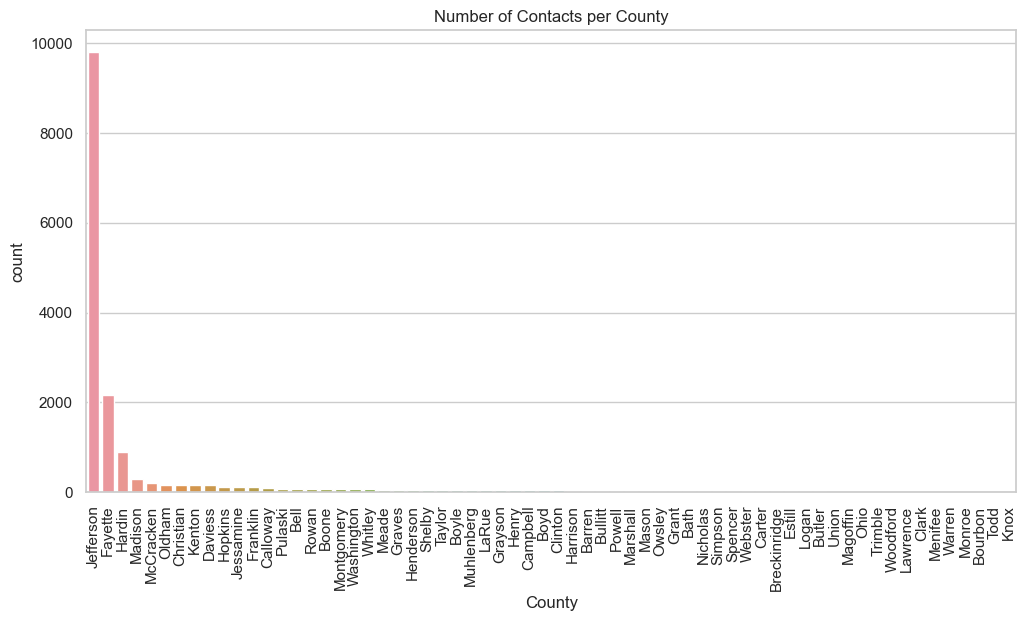

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_excel('profiles.xlsx')

# Plot the number of contacts per county
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='County', order=df['County'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Contacts per County')
plt.show()

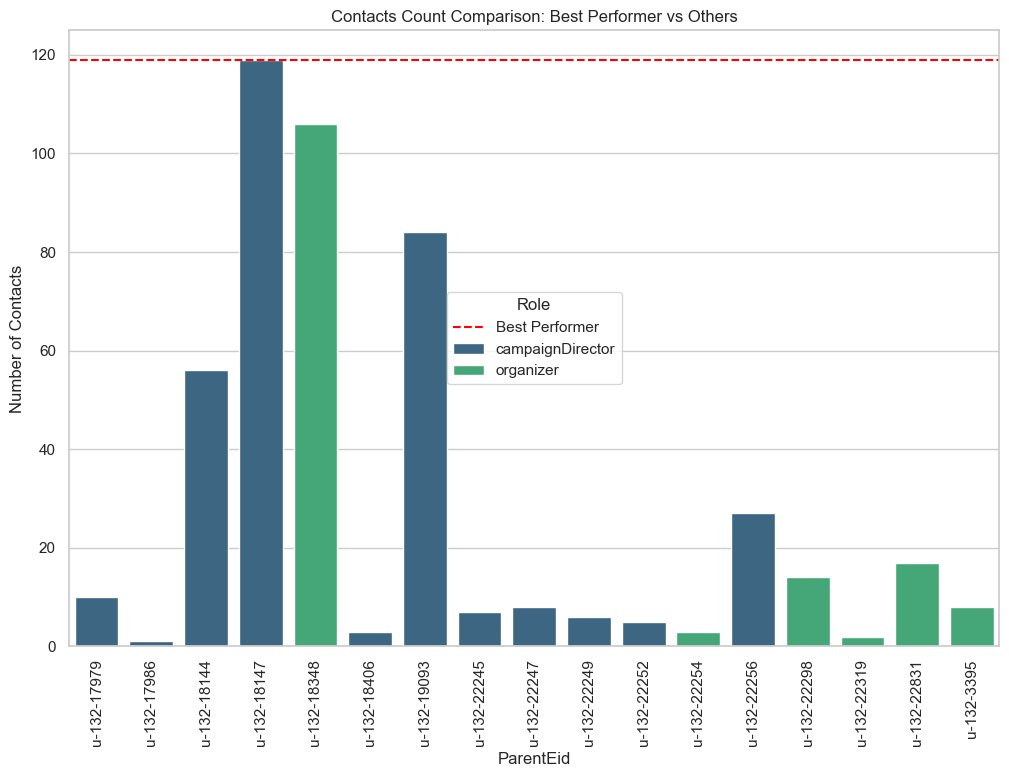

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('profiles.xlsx')

# Count the number of contacts per parentEid
contacts_count = df.groupby('parentEid').size().reset_index(name='contacts_count')

# Merge to get roles of parentEids
merged_df = pd.merge(contacts_count, df[['eid', 'role']], left_on='parentEid', right_on='eid')

# Filter for organizers and campaign directors
performance_df = merged_df[merged_df['role'].isin(['organizer', 'campaignDirector'])]

# Identify the best performer
best_performer_df = performance_df[performance_df['parentEid'] == 'u-132-18147']

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(data=performance_df, x='parentEid', y='contacts_count', hue='role', palette='viridis', dodge=False)
plt.axhline(y=best_performer_df['contacts_count'].values[0], color='red', linestyle='--', label='Best Performer')
plt.title('Contacts Count Comparison: Best Performer vs Others')
plt.xlabel('ParentEid')
plt.ylabel('Number of Contacts')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.legend(title='Role')
plt.show()